# Creating a Story Map Using Leaflet and CSVs

---

**Objectives:**

By the end of this exericse, you should be able to:

* Create an HTML page
* Host an interactive map (Leaflet) on GitHub Pages
* Create a storymap using Python, Leaflet, and CSV files

---

In this exercise, you will learn how to present spatial data in an interactive narrative similar to [ESRI StoryMaps](https://storymaps-classic.arcgis.com/en/gallery/#s=0) using open source products. You will learn how to host a live version of an HTML webpage on GitHub Pages.

<!-- If you double-click on the `raleigh.html` file in your folder, a map will open in your web browser. Next, let's open the `raleigh.html` file in **VS Code**. -->

This code is adapted from the `index.html` file from [this GitHub repository](https://github.com/HandsOnDataViz/leaflet-map-simple).

This exercise is an adaptation of the ["Leaflet Storymaps with Google Sheets" tutorial](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html) from the *Hands-On Data Visualization* book by Jack Dougherty & Ilya Ilyankou. The open-acess web edition of the book can be found [here](https://handsondataviz.org/).

Dougherty and Ilyankou developed Leaflet Storymaps with Google Sheets to create an open-source, easily migratable, story map tool. In this exercise, we are adapting their work with Google Sheets into using Python to create and edit CSVs to create the open-source storymap.

### Host a Live Leaflet Map on GitHub Pages

In order to host your storymap on the internet, you need to create a GitHub repository for this project. The best way to do this is to **fork** the leaflet-storymap-nr491 repo from [this repo](https://github.com/mdgaines/leaflet-storymap-nr491) on my (Mollie Gaines') GitHub.

Go to Settings > Pages and set Branch to `main` and save.

Edit your README.md to have the link to your new repo.

### Leaflet Storymap with CSVs

We are now going to start working on our Leaflet Storymap by building several `pandas dataframes` which we can save as a CSVs.

Our storymap will have a scrolling narrative that follows points along our map. You will learn how to add images, audio and video files, and different map backgrounds. 

We will build an in-class storymap to looking at different colleges and universities in Wake County.

In [51]:
import pandas as pd
import geopandas as gpd
import os
import folium
import csv

First, we will create an `Options.csv` file and save it in our `csv/` directory. We will create this CSV to look like the **Options** tab in the Google Sheet from the HODV exercise.

![GS_Options](./imgs/gs_options.PNG)

In [52]:
# Create lists for each row we are writing in our csv
header = ['Setting', 'Customize', 'Hints']
info = ['Storymap Info', '', \
    'For help, see tutorial in [HandsOnDataViz.org](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html)']
title = ['Storymap Title', 'NR491 Leaflet Storymap Demo', '']
subtitle = ['Storymap Subtitle', \
    "Colleges and Universities in Wake County<br><small>Scroll down<i class='fafa-chevron-down'></i></small>",\
    "Add your subtitle, or delete that portion"]
logo = ['Storymap Logo', 'media/ncsu_logo.jpg', 'Path to a logo image']
google_analysis = ['Google Analytics Tracking ID', '', 'Sample format: UA-5488840-29']

map_settings = ['Map Settings', '', '']
basemap_tiles = ['Basemap Tiles', 'CartoDB.Positron',\
    '[Drop-down menu for background basemap tiles](https://leaflet-extras.github.io/leaflet-providers/preview/)']
zoom = ['Zoom Controls', 'bottomright', '']
bg_color = ['Narrative Background Color', '', '']
txt_color = ['Narrative Text Color', '', '']
lnk_color = ['Narrative Link Color', '', '']
ch_color = ['Active Chapter Background Color','','']
media_height = ['Media Container Height','300',\
    'Maximum height of the image, in pixels. 200 is default. The image will be fit into the container with its proportions kept (it won\'t be skewed).']
pixels_after_char = ['Pixels After Final Chapter','600','In pixels, at least 100']
lightbox_imgs = ['Enable Lightbox for Images','yes','yes or no']

creds = ['Credits','','']
auth_name = ['Author Name','Add your name','Appears in map credits as "View data by..." (or leave blank)']
auth_email = ['Author Email or Website','','Create link in Author Name by inserting your email or web address (or leave blank)']
auth_GH = ['Author GitHub Repo Link','https://github.com/handsondataviz/leaflet-storymaps-with-google-sheets',\
    'Insert your code repo URL to appear as link in "View code..." (or leave blank)']
code_cred = ['Code Credit','<a href="https://handsondataviz.org">HandsOnDataViz</a>',\
    'Appears in credits as "...code by..." (or leave blank)']

**NOTE:** you can have several different basemap tiles that will appear in the background. 
The options we will look at are:

![Basemaps](./imgs/gs_basemap_tiles.PNG)

We can also choose where on our map we put our zoom controls. The options are:

![zoom](./imgs/gs_zoom.PNG)

Now, we'll write our first CSV.

In [53]:
# Check that the csv directory exists
if not os.path.exists('./csv'):
    os.mkdir('./csv')

# Create a new Options.csv

# opens a csv file in write mode
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Options_Template.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(info)
    writer.writerow(title)
    writer.writerow(subtitle)
    writer.writerow(logo)
    writer.writerow(google_analysis)

    writer.writerow(map_settings)
    writer.writerow(basemap_tiles)
    writer.writerow(zoom)
    writer.writerow(bg_color)
    writer.writerow(txt_color)
    writer.writerow(lnk_color)
    writer.writerow(ch_color)
    writer.writerow(media_height)
    writer.writerow(pixels_after_char)
    writer.writerow(lightbox_imgs)

    writer.writerow(creds)
    writer.writerow(auth_name)
    writer.writerow(auth_email)
    writer.writerow(auth_GH)
    writer.writerow(code_cred)


Now that we've saved our CSV, we will read it in as a Pandas DataFrame and make some edits so it is personalized for us.

**Note:** We could have written our original CSV with all the information we wanted, however now we can practice making edits.

In [54]:
# read in the options csv as a data frame
options_df = pd.read_csv('./csv/Options_Template.csv', index_col=0)
options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,NR491 Leaflet Storymap Demo,NaN
Storymap Subtitle,Colleges and Universities in Wake County<br><s...,"Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,NaN,NaN


In [55]:
# # we will index to the specific entry we want to edit using df[col][row] indexing.
# # we read in the df with the first column as our index to make this easier for ourselves

# # here, we are changing the background color of our narative bar
# options_df['Customize']['Narrative Background Color'] = 'lightgray'

# options_df

In [56]:
# Customize Options CSV and title page
options_df['Customize']['Author Name'] = 'Nathan Hayes'
options_df['Customize']['Storymap Title'] = 'A Glance at Raleigh Parks Compared to Demography and Income Distribution in Raleigh, NC'
options_df['Customize']['Author Email or Website'] = 'nthayes@ncsu.edu'
options_df['Customize']['Storymap Subtitle'] = 'StoryMap by Nathan Hayes'
options_df['Customize']['Storymap Logo'] = ''
options_df['Customize']['Narrative Background Color'] = 'light gray'
# save your options df as Options.csv
options_df.to_csv('./csv/Options.csv')
options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,A Glance at Raleigh Parks Compared to Demograp...,NaN
Storymap Subtitle,StoryMap by Nathan Hayes,"Add your subtitle, or delete that portion"
Storymap Logo,,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,light gray,NaN


Now let's checkout what our index.html file looks like so far.

### Chapters

We will add content to our map by creating a `Chapters.csv`.

However, first we will look through our data to get the information we are interested in.

Now, let's read in some of our spatial data.

In [57]:
# Filepaths
Quality_of_Parks_path = './data/Quality_of_Parks.geojson'

# Read data
Quality_of_Parks = gpd.read_file(Quality_of_Parks_path)

# Print CRS
print(Quality_of_Parks.crs)



EPSG:3358


In [58]:
# Reproject to WGS84
Quality_of_Parks_84 = Quality_of_Parks.to_crs(epsg=4326)


# Create a Geo-id which is needed by the Folium (it needs to have a unique identifier for each row)
Quality_of_Parks['geoid'] = Quality_of_Parks_84.index.astype(str)


We can use the `folium` package to see what our Leaflet map will look like.

In [59]:
# Create a Map instance centered on Raleigh
m = folium.Map(location=[35.7796, -78.6382], zoom_start=14, control_scale=True)

In [60]:
Quality_of_Parks

,OBJECTID,NAME,ALIAS1,ALIAS2,JURISDICTI,ADDRESS,Address2,URL,PHONE,ARTSCENTER,...,LIVEANIMAL,GARDENS,EQUESTRIAN,FORLOCATOR,CAMPING,geometry_x,geometry_y,Quality,geometry,geoid
0,104,Carolina Pines Park,NaN,NaN,City of Raleigh,"2305 Lake Wheeler Rd, Raleigh, NC","2305 Lake Wheeler Rd, Raleigh, NC",https://raleighnc.gov/places/carolina-pines-park,919-831-6435,No,...,NaN,NaN,NaN,Yes,NaN,639336.496835,221848.012133,Medium,POINT (639336.497 221848.012),0
1,529,Mary Belle Pate Park,NaN,NaN,City of Raleigh,"2640 Sierra Drive, Raleigh, NC",NaN,https://raleighnc.gov/places/mary-belle-pate-park,919-996-3285,NaN,...,NaN,NaN,NaN,Yes,NaN,638588.545636,222138.095432,Medium,POINT (638588.546 222138.095),1
2,447,Lake Johnson Park,NaN,NaN,City of Raleigh,"4601 Avent Ferry Rd, Raleigh, NC","4601 Avent Ferry Rd, Raleigh, NC",https://raleighnc.gov/places/lake-johnson-park,919-233-2121,No,...,NaN,NaN,NaN,Yes,NaN,635439.645039,223306.832228,Medium,POINT (635439.645 223306.832),2
3,446,Lake Johnson Nature Preserve,NaN,NaN,City of Raleigh,"4601 Avent Ferry Rd, Raleigh, NC","4601 Avent Ferry Rd, Raleigh, NC",https://raleighnc.gov/places/lake-johnson-park,919-233-2121,No,...,NaN,NaN,NaN,Yes,NaN,635439.645039,223306.832228,Low,POINT (635439.645 223306.832),3
4,458,Lake Johnson Pool,NaN,NaN,City of Raleigh,"1416 Athens Dr, Raleigh, NC","1416 Athens Dr, Raleigh, NC",https://raleighnc.gov/places/lake-johnson-pool,919-233-2111,No,...,NaN,NaN,NaN,Yes,NaN,635255.062539,224080.918726,Medium,POINT (635255.063 224080.919),4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,129,Cedar Hills Park,NaN,NaN,City of Raleigh,"5600 Sweetbriar Dr, Raleigh, NC","5600 Sweetbriar Dr, Raleigh, NC",https://raleighnc.gov/places/cedar-hills-park,919-870-2880,No,...,NaN,NaN,NaN,Yes,NaN,642979.922320,234214.885918,Medium,POINT (642979.922 234214.886),116
117,161,Dixon Drive Park,NaN,NaN,City of Raleigh,"6100 Dixon Dr, Raleigh, NC","6100 Dixon Dr, Raleigh, NC",https://raleighnc.gov/places/dixon-drive-park,919-831-6640,No,...,NaN,NaN,NaN,Yes,NaN,641050.177622,234465.767016,Low,POINT (641050.178 234465.767),117
118,610,Optimist Park,NaN,NaN,City of Raleigh,"5900 Whittier Dr, Raleigh, NC","5900 Whittier Dr, Raleigh, NC",https://raleighnc.gov/places/optimist-park,919-870-2880,No,...,NaN,NaN,NaN,Yes,NaN,641384.889522,234637.780816,Medium,POINT (641384.890 234637.781),118
119,503,Longstreet Park,NaN,NaN,City of Raleigh,"7334 Stuart Dr, Raleigh, NC","7334 Stuart Dr, Raleigh, NC",https://raleighnc.gov/places/longstreet-park,919-831-6640,No,...,NaN,NaN,NaN,Yes,NaN,641175.883821,235911.330115,Low,POINT (641175.884 235911.330),119


In [61]:
# Show the park points on the map

# Create park points on top of the map
for idx, row in Quality_of_Parks_84.iterrows():
    # Get lat and lon of points
    lon = row['geometry'].x
    lat = row['geometry'].y

    # Get park name information
    park_name = row['NAME']

    #Add markers to the map
    folium.Marker([lat,lon], popup=park_name).add_to(m)

m

Let's parse this data down to parks in Raleigh, and remove some of the information we are not interested in.

In [62]:
#Drop Unneccesary Columns
Webmap_Parks = Quality_of_Parks_84[Quality_of_Parks_84['JURISDICTI'] == 'City of Raleigh'].drop(['ALIAS1', \
    'ALIAS2', 'Notes', 'Address2' ], axis=1)

We will build our storymap with different topics of focus as chapters.

Now, let's make our `Chapters.csv` with specific column headers (**do not change the headers, they work with the background Leaflet code**) and a row for each of our chapters.

In [63]:
header = ['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link', 'Description', \
    'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency', \
    'GeoJSON Overlay', 'GeoJSON Feature Properties']

# Add any extra columns (Template: 
# nc_coll_raleigh.loc[[22], ['FOUNDED']] = 1857 # Peace College
# nc_coll_raleigh.loc[[32], ['FOUNDED']] = 1865 # Shaw University
# nc_coll_raleigh.loc[[65], ['FOUNDED']] = 1867 # St. Augustune's Universitync_coll_raleigh['FOUNDED'] = None )


In [64]:
park_names = [name.title() for name in Quality_of_Parks_84.NAME]
park_names

['Carolina Pines Park',
 'Mary Belle Pate Park',
 'Lake Johnson Park',
 'Lake Johnson Nature Preserve',
 'Lake Johnson Pool',
 'Thomas G. Crowder Woodland Center',
 'Kaplan Park',
 'Kentwood Park',
 'Spring Park',
 'Powell Drive Park',
 'Compiegne Park',
 'Rose Garden & Raleigh Little Theatre',
 'Chamberlain Park',
 'Method Community Park',
 'Isabella Cannon Park',
 'Pollock Place Park',
 'Hymettus Woods Park',
 'Windemere Beaver Dam Park',
 'Sanderford Road Park',
 'Peach Road Park',
 'Hertford Village Park',
 'Eliza Pool Park',
 'Caraleigh Park',
 'Dorothea Dix Park - Lake Wheeler Rd Entrance',
 'Bragg Street Park',
 'Walnut Terrace Park',
 'Barwell Road Park',
 'Anderson Point Park',
 'Anderson Point River Access',
 'Biltmore Hills Park',
 'Kingwood Forest Park',
 'Southgate Park',
 'Walnut Creek Wetland Center',
 'Walnut Creek Softball Complex',
 'Dacian Road Park',
 'Worthdale Park',
 'Apollo Heights Park',
 'Dr. Martin Luther King, Jr. Memorial Gardens',
 'Quarry Street Park',
 '

In [65]:
# # Create a new Chapters.csv

# # opens a csv file in write mode
# # the wuth statement makes sure the file closes properly when we're done
# with open('./csv/Chapters.csv', 'w', newline='') as options:
#     # create the csv writer
#     writer = csv.writer(options)

#     # write a row to the csv file
#     writer.writerow(header)

#     writer.writerow(['Overview of Raleigh'])

#     for name in park_names:
#         writer.writerow([name])

In [66]:
#Create Chapters
# Custom list of chapters
custom_chapters = [
    'Introduction',
    'Black or African American and White Population Distributions in Raleigh Census Tracts',
    'Income Distribution in Raleigh Census Tracts',
    'Raleigh Park Locations Compared to Income Distribution in 2021 and Difference in Black and White Population Distribution in 2020',
    'Raleigh Park Kernel Density Analysis',
    'Conclusion'
]

# CSV file path
csv_file_path = './csv/Chapters.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    # Create the CSV writer
    writer = csv.writer(csvfile)
    # Move this line outside the loop to avoid writing the header multiple times
    writer.writerow(header)
    # Write the custom chapters to the CSV file
    for chapter in custom_chapters:
        writer.writerow([chapter])

print(f'Custom chapters written to {csv_file_path}')


Custom chapters written to ./csv/Chapters.csv


In [67]:
chapter_df = pd.read_csv('./csv/Chapters.csv')

In [68]:
chapter_df.columns

Index(['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link',
       'Description', 'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude',
       'Longitude', 'Overlay', 'Overlay Transparency', 'GeoJSON Overlay',
       'GeoJSON Feature Properties'],
      dtype='object')

In [69]:
#Change information for introduction
# path to the image used for this chapter
chapter_df.loc[[0], ['Media Link']] = 'media/Intro_Image.jpg'
# Name of image source
chapter_df.loc[[0], ['Media Credit']] = 'Source: This is Raleigh'
# Link to image
chapter_df.loc[[0], ['Media Credit Link']] = 'https://thisisraleigh.com/parks-in-raleigh-nc/'
# Narrative description
chapter_df.loc[[0], ['Description']] = "This storymap aims to investigate any relationships between park locations, household median income, and White and Black or African American population distributions in Raleigh census tracts. Raleigh has over 200 parks and Raleigh's Recreation and Cultural Resources Department's mission is to: establish and advance an equitable and inclusive community for all and to bring people to parks and parks to people!"
# Zoom level
chapter_df.loc[[0], ['Zoom']] = 15.75
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[0], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[0], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[0], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[0], ['Latitude']] = 35.7796
chapter_df.loc[[0], ['Longitude']] = -78.6382
chapter_df.to_csv('./csv/Chapters.csv')

In [70]:
#Change Information for Chapter 1 - 'Chapter 1: Black or African American and White Population Distributions in Raleigh Census Tracts'
# path to the image used for this chapter
chapter_df.loc[[1], ['Media Link']] = './media/White_and_Black_Populations_Plot.png'
# Name of image source
chapter_df.loc[[1], ['Media Credit']] = ''
# Link to image
chapter_df.loc[[1], ['Media Credit Link']] = ''
# Narrative description
chapter_df.loc[[1], ['Description']] = "These plots display the distribution of White and Black or African American populations in Raleigh Census Tracts based on 2020 data"
# Zoom level
chapter_df.loc[[1], ['Zoom']] = 15.75
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[1], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[1], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[1], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[1], ['Latitude']] = 35.7796
chapter_df.loc[[1], ['Longitude']] = -78.6382
chapter_df.to_csv('./csv/Chapters.csv')

In [71]:
#Change Information for Chapter 2 - 'Income Distribution in Raleigh Census Tracts'
# path to the image used for this chapter
chapter_df.loc[[2], ['Media Link']] = './media/Income_Plots.png'
# Name of image source
chapter_df.loc[[2], ['Media Credit']] = ''
# Link to image
chapter_df.loc[[2], ['Media Credit Link']] = ''
# Narrative description
chapter_df.loc[[2], ['Description']] = "These plots display total population per census tract and median income distribution based on overall median household income, White alone median household income, and Black or African American alone median household income in Raleigh Census Tracts in 2021"
# Zoom level
chapter_df.loc[[2], ['Zoom']] = 15.75
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[2], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[2], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[2], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[2], ['Latitude']] = 35.7796
chapter_df.loc[[2], ['Longitude']] = -78.6382
chapter_df.to_csv('./csv/Chapters.csv')

In [72]:
#Change Information for Chapter 3 - 'Raleigh Park Locations Compared to Income Distribution in 2021 and Difference in Black and White Population Distribution in 2020'
# path to the image used for this chapter
chapter_df.loc[[3], ['Media Link']] = './media/RaleighParkLocationsComparedtoIncomeandDemo.png'
# Name of image source
chapter_df.loc[[3], ['Media Credit']] = ''
# Link to image
chapter_df.loc[[3], ['Media Credit Link']] = ''
# Narrative description
chapter_df.loc[[3], ['Description']] = "These figures display Raleigh Park locations compared to 2021 median household income and 2020 demographic data in Raleigh census tracts. The locations of Raleigh Park points and areas are shown overlayed on both figures. This provides visual insight into park locations compared to income and demograhics in Raleigh. From here, patterns and relationships can start to be formed; however, more detailed analysis is required to begin drawing conclusions"
# Zoom level
chapter_df.loc[[3], ['Zoom']] = 15.75
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[3], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[3], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[3], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[3], ['Latitude']] = 35.7796
chapter_df.loc[[3], ['Longitude']] = -78.6382
chapter_df.to_csv('./csv/Chapters.csv')

In [73]:
#Change Information for Chapter 4 - 'Raleigh Park Kernel Density Analysis'
# path to the image used for this chapter
chapter_df.loc[[3], ['Media Link']] = './media/KernelDensity_IncomeandDemo.png'
# Name of image source
chapter_df.loc[[3], ['Media Credit']] = ''
# Link to image
chapter_df.loc[[3], ['Media Credit Link']] = ''
# Narrative description
chapter_df.loc[[3], ['Description']] = "These plots display kernel density analysis of park points in Raleigh. The result shows a dense cluster in the south/central area of Raleigh, which is downtown."
# Zoom level
chapter_df.loc[[3], ['Zoom']] = 15.75
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[3], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[3], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[3], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[3], ['Latitude']] = 35.7796
chapter_df.loc[[3], ['Longitude']] = -78.6382
chapter_df.to_csv('./csv/Chapters.csv')

In [74]:
# for i in nc_coll_raleigh.index:
#     # print(nc_coll_raleigh.iloc[i])
#     school_name = nc_coll_raleigh.loc[[i], ['NAME']].values[0][0].title()
#     lat = nc_coll_raleigh.loc[[i], ['Y']].values[0][0]
#     lon = nc_coll_raleigh.loc[[i], ['X']].values[0][0]
#     address = nc_coll_raleigh.loc[[i], ['ADDRESS']].values[0][0]

#     chapter_df.loc[chapter_df['Chapter'] == school_name, 'Latitude'] = lat
#     chapter_df.loc[chapter_df['Chapter'] == school_name, 'Longitude'] = lon
#     chapter_df.loc[chapter_df['Chapter'] == school_name, 'Location'] = address

#     chapter_df.loc[chapter_df['Chapter'] == school_name, 'Zoom'] = 16
#     chapter_df.loc[chapter_df['Chapter'] == school_name, 'Marker'] = 'Plain'
#     chapter_df.loc[chapter_df['Chapter'] == school_name, 'Marker Color'] = 'blue'

# chapter_df


We have a map! We also have some images, links, and narrative text appearing.

Now, let's add a new image and image source information for Peace College.

Now, let's save this to a CSV and see how this changes our storymap.

In [75]:
chapter_df.to_csv('./csv/Chapters.csv')

In [76]:
# Check our work
chapter_df.head()

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Introduction,media/Intro_Image.jpg,Source: This is Raleigh,https://thisisraleigh.com/parks-in-raleigh-nc/,This storymap aims to investigate any relation...,15.75,Hidden,,"Raleigh, NC",35.7796,-78.6382,NaN,NaN,NaN,NaN
1,Black or African American and White Population...,./media/White_and_Black_Populations_Plot.png,,,These plots display the distribution of White ...,15.75,Hidden,,"Raleigh, NC",35.7796,-78.6382,NaN,NaN,NaN,NaN
2,Income Distribution in Raleigh Census Tracts,./media/Income_Plots.png,,,These plots display total population per censu...,15.75,Hidden,,"Raleigh, NC",35.7796,-78.6382,NaN,NaN,NaN,NaN
3,Raleigh Park Locations Compared to Income Dist...,./media/KernelDensity_IncomeandDemo.png,,,These plots display kernel density analysis of...,15.75,Hidden,,"Raleigh, NC",35.7796,-78.6382,NaN,NaN,NaN,NaN
4,Raleigh Park Kernel Density Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, we'll look at adding a video to our narrative bar.

In order to add a YouTube video to our storymap, we need to first find a YouTube video we want to add. For this example, let's follow [this link](https://www.youtube.com/watch?v=aZQFQnbs_Ho) to a fan-made hype video of the NC State Football Team.

Next, click the `Share` button at the bottom right of the video and then click `Embed`. Next, **only** copy the link that appears after `src="`. We will use that in our next code chunk.

<!-- Link that should be copied: https://www.youtube.com/embed/aZQFQnbs_Ho" -->

Let's look at our `index.html` again. What has changed? Does it look the way you expect?

### Overlay GeoJSON

Next, we'll add a GeoJSON file to our map. Leaflet uses GeoJSONs instead of Shapefiles. If you mostly use Shapefiles, just open them into QGIS and save them as GeoJSONs to get them ready for the storymap.

All of our GeoJSONs need be saved in the `geojson` folder.

**Important:** Your GeoJSON files **MUST** be in a recognized projection and have a `"crs"` attribute. *It will be easiest for you if they are all in the same CRS.*

Let's add our GeoJSON of NC State's campuses.

In [77]:
chapter_df.loc[4, "GeoJSON Overlay"] = "geojson/NCSU_campuses.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[4, "GeoJSON Feature Properties"] = "fillColor:red;color:black"

# save the Chapters.csv and look at the index.html file
chapter_df.to_csv('./csv/Chapters.csv')

To change a specific campus color, we will need to edit the GeoJSON itself.

*NOTE: I am working on integrating another set of Leaflet code so that you will not have to manually edit the GeoJSON files, but it's not ready yet.*

To edit the GeoJSON file, open it with a text-editor (like Notepad) or in VS Code. Use `ctrl+f` to find `"properties"`. GeoJSON files are essentially full of dictionaries. After the `"Precinct_N"` key:value pair, add `"fillColor": "blue",` and save your changes.

Refresh your `index.html`. Do you see any changes? (Note: it can take a while for changes to be fully processed. Make sure everything is saved.)

In [78]:
# Add Wake county census tracts to your map for a chapter of your choice
chapter_df = pd.read_csv('./csv/Chapters.csv')
ncsu_campuses = gpd.read_file('./geojson/NCSU_campuses.geojson')
wake_co = gpd.read_file('./geojson/wake_county_census_tracts.geojson')

ncsu_campuses

,SUM_SUM_Ar,Shape_Leng,Precinct_N,fillColor,Shape_STAr,Shape_STLe,geometry
0,1116.908262,6.029383e+04,Centennial Campus,blue,4.865238e+07,6.029358e+04,"MULTIPOLYGON (((-78.67050 35.77580, -78.67036 ..."
1,302.952457,2.845443e+04,Central Campus,NaN,1.319661e+07,2.845443e+04,"MULTIPOLYGON (((-78.68280 35.78950, -78.68254 ..."
2,1991.331099,8.733674e+04,Lake Wheeler,NaN,8.674233e+07,8.733674e+04,"MULTIPOLYGON (((-78.69761 35.74287, -78.69761 ..."
3,95.435956,1.824359e+04,North Campus,NaN,4.157191e+06,1.824359e+04,"MULTIPOLYGON (((-78.67454 35.78892, -78.67442 ..."
4,622.168177,4.868044e+04,Reedy Creek,NaN,2.710165e+07,4.868044e+04,"MULTIPOLYGON (((-78.72494 35.82169, -78.72341 ..."
5,122.071431,1.412608e+04,South Campus,NaN,5.317432e+06,1.412608e+04,"MULTIPOLYGON (((-78.67971 35.78028, -78.67923 ..."
6,498.647592,4.145296e+04,West Campus,NaN,2.172109e+07,4.145296e+04,"MULTIPOLYGON (((-78.69998 35.80332, -78.69831 ..."
7,100852.700987,1.648909e+06,Outlying,NaN,4.393056e+09,1.648909e+06,"MULTIPOLYGON (((-77.41712 35.04149, -77.40811 ..."


In [79]:
# Try to change the census tract for the school in your chapter to a different color
wake_co['fillColor'] = '#ead1dc'

wake_co[wake_co['AWATER']> 0]

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,fillColor,geometry
2,37,183,052404,1400000US37183052404,37183052404,524.04,CT,3192566,88971,#ead1dc,"MULTIPOLYGON (((-78.72298 35.77047, -78.70918 ..."
3,37,183,052705,1400000US37183052705,37183052705,527.05,CT,4596046,37299,#ead1dc,"MULTIPOLYGON (((-78.61760 35.81766, -78.61619 ..."
4,37,183,053203,1400000US37183053203,37183053203,532.03,CT,7566406,19014,#ead1dc,"MULTIPOLYGON (((-78.83525 35.66674, -78.83284 ..."
5,37,183,053509,1400000US37183053509,37183053509,535.09,CT,6600566,379151,#ead1dc,"MULTIPOLYGON (((-78.82873 35.75496, -78.82873 ..."
7,37,183,054001,1400000US37183054001,37183054001,540.01,CT,3471533,16707,#ead1dc,"MULTIPOLYGON (((-78.63957 35.85887, -78.63807 ..."
...,...,...,...,...,...,...,...,...,...,...,...
179,37,183,053110,1400000US37183053110,37183053110,531.10,CT,29093756,25918,#ead1dc,"MULTIPOLYGON (((-78.73756 35.60704, -78.73716 ..."
181,37,183,052701,1400000US37183052701,37183052701,527.01,CT,6818009,10896,#ead1dc,"MULTIPOLYGON (((-78.62878 35.83044, -78.62641 ..."
183,37,183,053205,1400000US37183053205,37183053205,532.05,CT,8260892,367810,#ead1dc,"MULTIPOLYGON (((-78.82947 35.63560, -78.82294 ..."
185,37,183,053716,1400000US37183053716,37183053716,537.16,CT,3192959,62880,#ead1dc,"MULTIPOLYGON (((-78.66246 35.85630, -78.66124 ..."


In [80]:
wake_co.loc[wake_co['AWATER']<= 50000, 'fillColor']  = '#6fa8dc'
wake_co.loc[(wake_co['AWATER'] > 50000) & (wake_co['AWATER'] <= 100000), 'fillColor'] = '#cfe2f3'
wake_co.loc[wake_co['AWATER']>100000, 'fillColor']  = '#20124d'

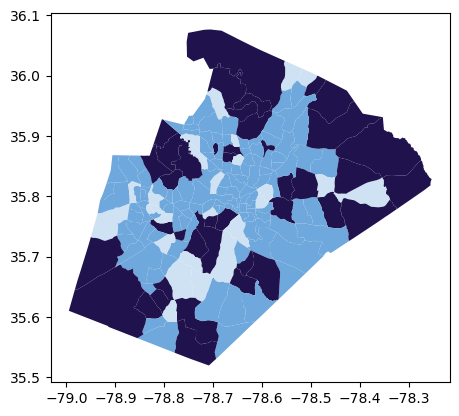

In [81]:
wake_co.plot(color=wake_co['fillColor'])

wake_co.to_file('./geojson/wake_county_census_tracts.geojson', driver='GeoJSON')

Now, let's add another historic map of Raleigh. Go to https://mapwarper.net/ and put "raleigh" in the search bar. Select "Rectified maps only" and search. 

Look through the maps and find one you want to use. Click on the "Export" tab at the top and copy the link from the "Tiles (Google/OSM scheme):" option.

<!-- https://mapwarper.net/maps/tile/44859/{z}/{x}/{y}.png -->

In [82]:
# Add this link to the Overlay column to a chapter of your choice
# remember, if the historical map does not overlap with the school for that chapter, 
# we will need to manually zoom out to see it or change our zoom settings



Try adding new images, text, vidoes, and GeoJSON files to different chapters. 
Remember to add the data we are adding to their respective folders.

### Colormaps and GeoJSONs

In [83]:
from matplotlib import colormaps
# list(colormaps)
# from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

from pylab import cm

In [84]:
# Set up to visualize the colors you want to use:

# number of classes you need
n_classes = 256
gradient = np.linspace(0, 1, n_classes)
gradient = np.vstack((gradient, gradient))

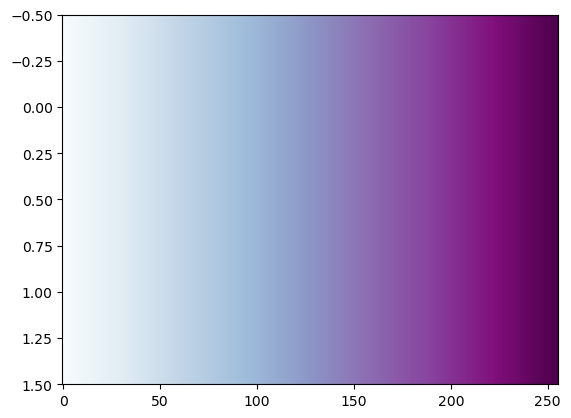

In [85]:
# Choose the color ramp you want
colormap_name = 'BuPu'

# Plot the color map
plt.imshow(gradient, aspect='auto', cmap=mpl.colormaps[colormap_name])

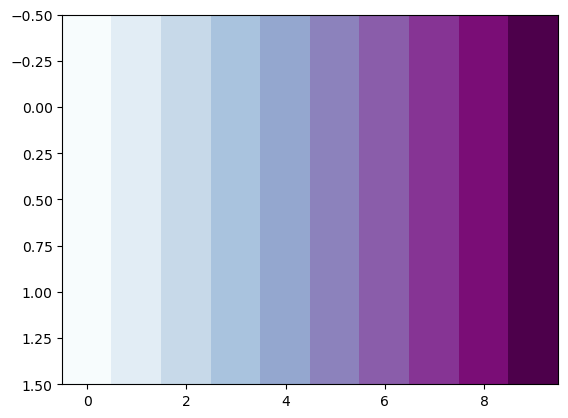

In [86]:
# number of classes you need
n_classes = 10
gradient = np.linspace(0, 1, n_classes)
gradient = np.vstack((gradient, gradient))

# Choose the color ramp you want
colormap_name = 'BuPu'

# Plot the color map
plt.imshow(gradient, aspect='auto', cmap=mpl.colormaps[colormap_name])

#### Exploring colormaps
Check out more details on colormaps [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [87]:
# adapted from matplotlib documentation
def plot_color_gradients(category, cmap_list, gradient):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(8, figh+2.5))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.25 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=16)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=14,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # # Save colormap list for later.
    # cmaps[category] = cmap_list

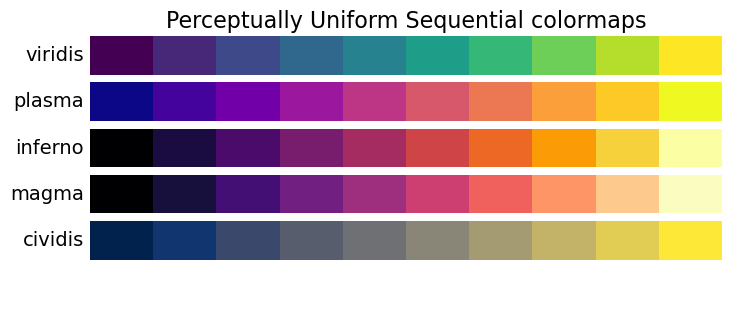

In [88]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'],
                     gradient)

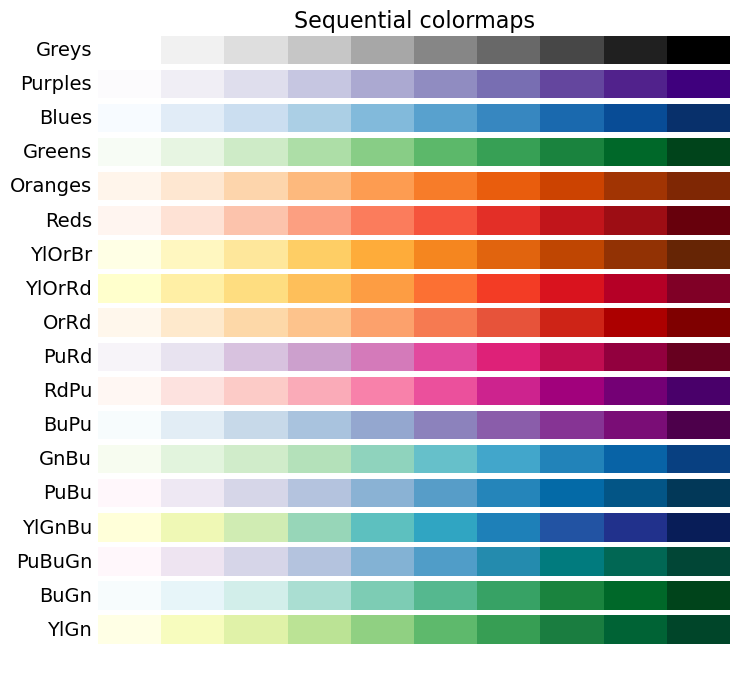

In [89]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'],
                      gradient)

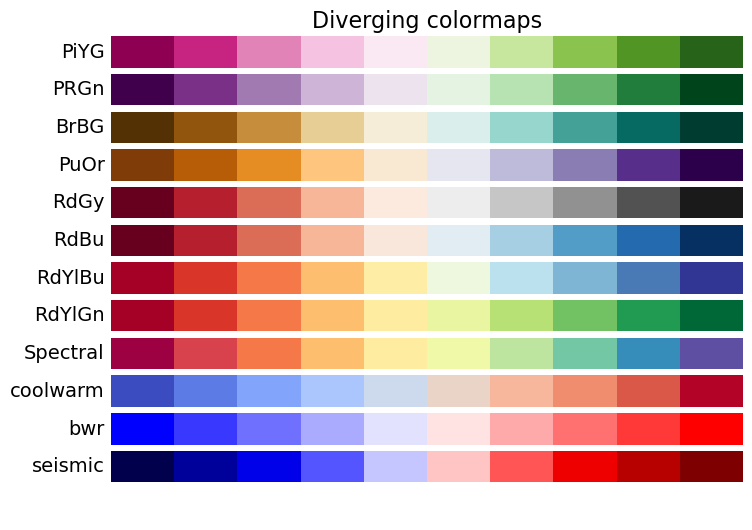

In [90]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'],
                      gradient)

#### Get colormap values to use in GeoJSON

In [91]:
def plot_hex_color_gradients(cmap, rows:int=2, columns:int=5):
    
    # Get list of hexidecimal color values
    cmap_hex_lst = [mpl.colors.rgb2hex(cmap(c)) for c in range(cmap.N)]
    
    # Reorder hex labels in a snake pattern - start with top left, end bottom left
    cmap_hex_lst_reordered = np.reshape(cmap_hex_lst, (rows, columns))
    cmap_hex_lst_reordered[1] = np.flip(cmap_hex_lst_reordered[1], 0)

    # Reorder color values in a snake pattern - start with top left, end bottom left
    cmap_col_reordered = np.reshape(list(range(cmap.N)), (rows, columns))
    cmap_col_reordered[1] = np.flip(cmap_col_reordered[1], 0)


    # Plot
    fig, ax = plt.subplots(figsize=(cmap.N, columns / rows + 1))
    im = ax.imshow(cmap_col_reordered, aspect='auto', cmap=cmap)

    # Loop over data dimensions and create text annotations.
    for i in range(rows):
        if i == 0:
            text_col = 'black'
        else:
            text_col = 'w'
        for j in range(columns):
            text = ax.text(j, i, cmap_hex_lst_reordered[i, j],
                        ha="center", va="center", color=text_col,
                        size=16)
    # Remove axis titles    
    ax.set_axis_off()
    
    # Add name of colormap
    ax.set_title(cmap.name, size = 20)

    # return regular ordered hex color values
    return(cmap_hex_lst)

C:\Users\natha\AppData\Local\Temp\ipykernel_20812\2594266872.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('BuPu', 10)


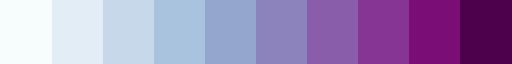

In [92]:
cmap = cm.get_cmap('BuPu', 10)
cmap


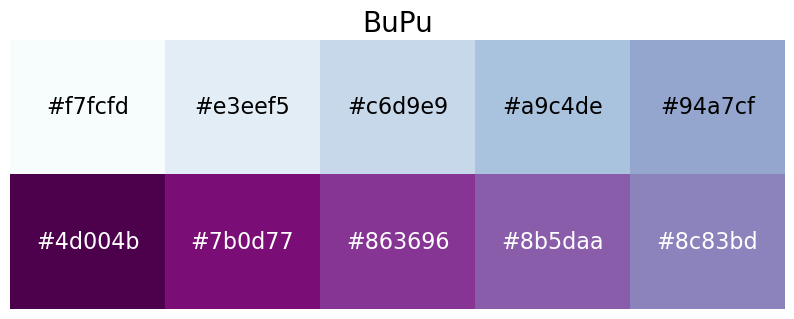

In [93]:
cmap_hex_values = plot_hex_color_gradients(cmap)

In [94]:
cmap_hex_values

['#f7fcfd',
 '#e3eef5',
 '#c6d9e9',
 '#a9c4de',
 '#94a7cf',
 '#8c83bd',
 '#8b5daa',
 '#863696',
 '#7b0d77',
 '#4d004b']

In [95]:
print(
f'''
min: {np.min(wake_co['AWATER'])}
10: {np.percentile(wake_co['AWATER'], 10)}
20: {np.percentile(wake_co['AWATER'], 20)}
30: {np.percentile(wake_co['AWATER'], 30)}
40: {np.percentile(wake_co['AWATER'], 40)}
50: {np.percentile(wake_co['AWATER'], 50)}
60: {np.percentile(wake_co['AWATER'], 60)}
70: {np.percentile(wake_co['AWATER'], 70)}
80: {np.percentile(wake_co['AWATER'], 80)}
90: {np.percentile(wake_co['AWATER'], 90)}
max: {np.max(wake_co['AWATER'])}
''')


min: 0
10: 0.0
20: 0.0
30: 0.0
40: 8947.800000000003
50: 22695.0
60: 39982.6
70: 64552.79999999999
80: 137487.80000000002
90: 394607.2
max: 20839777



In [96]:
wake_co['fillColor'] = cmap_hex_values[0]

for i in range(cmap.N):
    # print((i+1) * 10)
    print(np.percentile(wake_co['AWATER'], (i+1) * 10))
    print(cmap_hex_values[i])
    wake_co.loc[wake_co['AWATER'] >= np.percentile(wake_co['AWATER'], (i+1) * 10), 'fillColor']  = cmap_hex_values[i]
wake_co


0.0
#f7fcfd
0.0
#e3eef5
0.0
#c6d9e9
8947.800000000003
#a9c4de
22695.0
#94a7cf
39982.6
#8c83bd
64552.79999999999
#8b5daa
137487.80000000002
#863696
394607.2
#7b0d77
20839777.0
#4d004b


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,fillColor,geometry
0,37,183,050300,1400000US37183050300,37183050300,503,CT,1040114,0,#c6d9e9,"MULTIPOLYGON (((-78.65288 35.79573, -78.64755 ..."
1,37,183,051000,1400000US37183051000,37183051000,510,CT,973171,0,#c6d9e9,"MULTIPOLYGON (((-78.66065 35.78540, -78.65750 ..."
2,37,183,052404,1400000US37183052404,37183052404,524.04,CT,3192566,88971,#8b5daa,"MULTIPOLYGON (((-78.72298 35.77047, -78.70918 ..."
3,37,183,052705,1400000US37183052705,37183052705,527.05,CT,4596046,37299,#94a7cf,"MULTIPOLYGON (((-78.61760 35.81766, -78.61619 ..."
4,37,183,053203,1400000US37183053203,37183053203,532.03,CT,7566406,19014,#a9c4de,"MULTIPOLYGON (((-78.83525 35.66674, -78.83284 ..."
...,...,...,...,...,...,...,...,...,...,...,...
182,37,183,052904,1400000US37183052904,37183052904,529.04,CT,27418106,0,#c6d9e9,"MULTIPOLYGON (((-78.69003 35.59833, -78.68631 ..."
183,37,183,053205,1400000US37183053205,37183053205,532.05,CT,8260892,367810,#863696,"MULTIPOLYGON (((-78.82947 35.63560, -78.82294 ..."
184,37,183,053424,1400000US37183053424,37183053424,534.24,CT,3235569,0,#c6d9e9,"MULTIPOLYGON (((-78.85118 35.78294, -78.85053 ..."
185,37,183,053716,1400000US37183053716,37183053716,537.16,CT,3192959,62880,#8c83bd,"MULTIPOLYGON (((-78.66246 35.85630, -78.66124 ..."


<Axes: >

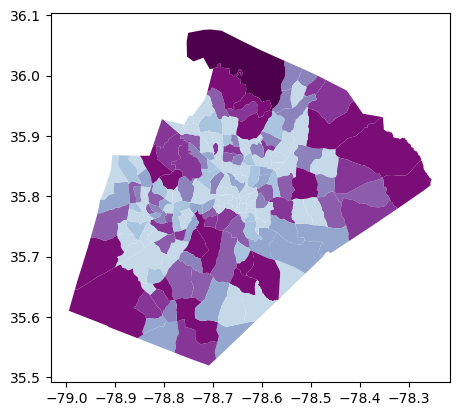

In [97]:
wake_co.plot(color=wake_co['fillColor'])


In [98]:
wake_co.to_file('./geojson/wake_co_census_colored_AWATER.geojson', driver='GeoJSON')


In [99]:
chapter_df.loc[chapter_df['Chapter']=='Wake Technical Community College', 'GeoJSON Overlay'] = 'geojson/wake_co_census_colored_AWATER.geojson'
chapter_df.loc[chapter_df['Chapter']=='Wake Technical Community College', 'GeoJSON Feature Properties'] = 'fillColor:gray;color:white'


In [100]:
chapter_df.to_csv('./csv/Chapters.csv')